## <u>About the Dataset</u>

* The data contains various details and attributes associated with the old car. 

## <u>Data source</u>
* Kaggle 
## <u>Problem Statement</u>
* To predict the used car price, it's a regression Problem 

#### Importing the libraries 

In [1]:
import pandas as pd # for DataFrame 
import numpy as np # for Linear algebra 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
from sklearn.impute import SimpleImputer

#### Importing Dataset 


In [2]:
df=pd.read_csv('train.csv',parse_dates=['Year'])

In [3]:
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015-01-01,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
1,2,Honda Jazz V,Chennai,2011-01-01,46000,Petrol,Manual,First,13 km/kg,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
2,3,Maruti Ertiga VDI,Chennai,2012-01-01,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
3,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013-01-01,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
4,6,Nissan Micra Diesel XV,Jaipur,2013-01-01,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50


In [4]:
df.sample(5)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
5137,5286,BMW 3 Series 320d Corporate Edition,Chennai,2008-01-01,89000,Diesel,Automatic,Second,16.07 kmpl,1995 CC,181 bhp,4.0,NaN,6.30
3213,3317,Toyota Fortuner 4x2 AT,Delhi,2014-01-01,89540,Diesel,Automatic,First,12.55 kmpl,2982 CC,168.5 bhp,7.0,NaN,16.80
4856,5000,Toyota Etios Liva GD SP,Hyderabad,2015-01-01,69189,Diesel,Manual,First,23.59 kmpl,1364 CC,67.06 bhp,5.0,NaN,5.30
1603,1655,Skoda Superb Elegance 1.8 TSI AT,Delhi,2014-01-01,80000,Petrol,Automatic,First,13.7 kmpl,1798 CC,157.75 bhp,5.0,NaN,10.75
2788,2877,Tata Tigor 1.05 Revotorq XZ Option,Kochi,2019-01-01,29279,Diesel,Manual,First,24.7 kmpl,1047 CC,69 bhp,5.0,NaN,7.46


### <u>Steps</u>

* Basic details of Dataset
* EDA 
* Feature Engineering and selection
* Model Training

#### Checking the data size

In [5]:
df.shape

(5847, 14)

####  Checking the inforamation of the columns 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5847 entries, 0 to 5846
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         5847 non-null   int64         
 1   Name               5847 non-null   object        
 2   Location           5847 non-null   object        
 3   Year               5847 non-null   datetime64[ns]
 4   Kilometers_Driven  5847 non-null   int64         
 5   Fuel_Type          5847 non-null   object        
 6   Transmission       5847 non-null   object        
 7   Owner_Type         5847 non-null   object        
 8   Mileage            5845 non-null   object        
 9   Engine             5811 non-null   object        
 10  Power              5811 non-null   object        
 11  Seats              5809 non-null   float64       
 12  New_Price          815 non-null    object        
 13  Price              5847 non-null   float64       
dtypes: datet

#### Checking if there are any missing data in the dataset

In [7]:
df.isna().apply(pd.value_counts).T

,False,True
Unnamed: 0,5847.0,NaN
Name,5847.0,NaN
Location,5847.0,NaN
Year,5847.0,NaN
Kilometers_Driven,5847.0,NaN
Fuel_Type,5847.0,NaN
Transmission,5847.0,NaN
Owner_Type,5847.0,NaN
Mileage,5845.0,2.0
Engine,5811.0,36.0


#### <u> Observation</u>

* In "New_Price" column 86% data is missing 
* "Unnamed: 0" is not useful for the analysis 

#### Checking if is there any duplicate data in the dataset

In [8]:
df.duplicated().sum()

0

#### How the data is looking mathematically

In [9]:
df.describe()

,Unnamed: 0,Kilometers_Driven,Seats,Price
count,5847.000000,5.847000e+03,5809.000000,5847.000000
mean,3013.181461,5.841013e+04,5.286452,9.653742
std,1736.398890,9.237971e+04,0.806668,11.275966
min,1.000000,1.710000e+02,2.000000,0.440000
25%,1509.500000,3.346750e+04,5.000000,3.550000
50%,3015.000000,5.257600e+04,5.000000,5.750000
75%,4517.500000,7.249050e+04,5.000000,10.250000
max,6018.000000,6.500000e+06,10.000000,160.000000


#### Performing EDA 

In [10]:
df.drop(['Unnamed: 0','New_Price'],axis=1,inplace=True)

In [11]:
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Hyundai Creta 1.6 CRDi SX Option,Pune,2015-01-01,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
1,Honda Jazz V,Chennai,2011-01-01,46000,Petrol,Manual,First,13 km/kg,1199 CC,88.7 bhp,5.0,4.50
2,Maruti Ertiga VDI,Chennai,2012-01-01,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
3,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013-01-01,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
4,Nissan Micra Diesel XV,Jaipur,2013-01-01,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,3.50
...,...,...,...,...,...,...,...,...,...,...,...,...
5842,Maruti Swift VDI,Delhi,2014-01-01,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
5843,Hyundai Xcent 1.1 CRDi S,Jaipur,2015-01-01,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
5844,Mahindra Xylo D4 BSIV,Jaipur,2012-01-01,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
5845,Maruti Wagon R VXI,Kolkata,2013-01-01,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65


#### Treating Mixed value Columns 

In [12]:
df['Mileage_num']=df['Mileage'].str.split(" ",expand=True)[0]

In [13]:
df['Mileage_cat']=df['Mileage'].str.split(' ',expand=True)[1]

In [14]:
df['Engine_num']=df['Engine'].str.split(' ',expand=True)[0]

In [15]:
df['Engine_cat']=df['Engine'].str.split(' ',expand=True)[1]

In [16]:
df['Power_num']=df['Power'].str.split(' ',expand=True)[0]


In [17]:
df['Power_cat']=df['Power'].str.split(' ',expand=True)[1]

In [18]:
df.sample(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Mileage_num,Mileage_cat,Engine_num,Engine_cat,Power_num,Power_cat
5472,Maruti Swift Dzire VDI,Hyderabad,2015-01-01,59572,Diesel,Manual,First,26.59 kmpl,1248 CC,74 bhp,5.0,6.85,26.59,kmpl,1248,CC,74,bhp
4862,Maruti Swift VDI BSIV,Chennai,2013-01-01,87192,Diesel,Manual,First,25.2 kmpl,1248 CC,74 bhp,5.0,4.35,25.2,kmpl,1248,CC,74,bhp
231,Chevrolet Beat Diesel LT,Mumbai,2013-01-01,74000,Diesel,Manual,First,25.44 kmpl,936 CC,57.6 bhp,5.0,2.65,25.44,kmpl,936,CC,57.6,bhp
4472,Maruti Zen LXi - BS III,Hyderabad,2006-01-01,80000,Petrol,Manual,Second,17.3 kmpl,993 CC,60 bhp,5.0,1.20,17.3,kmpl,993,CC,60,bhp
5703,Maruti Swift VDI,Pune,2014-01-01,84000,Diesel,Manual,First,22.9 kmpl,1248 CC,74 bhp,5.0,5.25,22.9,kmpl,1248,CC,74,bhp


In [19]:
df['Mileage_cat'].value_counts()

kmpl     5842
km/kg       3
Name: Mileage_cat, dtype: int64

In [20]:
df['Engine_cat'].value_counts()

CC    5811
Name: Engine_cat, dtype: int64

In [21]:

df['Power_cat'].value_counts()

bhp    5811
Name: Power_cat, dtype: int64

In [22]:
# There are 3 Km/Kg raws so droping those raws

In [23]:
df['Mileage_cat'][df['Mileage_cat']=='km/kg']

1     km/kg
24    km/kg
56    km/kg
Name: Mileage_cat, dtype: object

In [24]:
df.drop(index=[1,24,56],axis=0,inplace=True)

In [25]:
df['Mileage_cat'].value_counts()

kmpl    5842
Name: Mileage_cat, dtype: int64

In [26]:
df.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price', 'Mileage_num', 'Mileage_cat', 'Engine_num', 'Engine_cat',
       'Power_num', 'Power_cat'],
      dtype='object')

In [27]:
col_to_drop=['Mileage','Engine','Power','Mileage_cat','Engine_cat','Power_cat']

In [28]:
df.drop(columns=col_to_drop,axis=1,inplace=True)

In [29]:
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Mileage_num,Engine_num,Power_num
0,Hyundai Creta 1.6 CRDi SX Option,Pune,2015-01-01,41000,Diesel,Manual,First,5.0,12.50,19.67,1582,126.2
2,Maruti Ertiga VDI,Chennai,2012-01-01,87000,Diesel,Manual,First,7.0,6.00,20.77,1248,88.76
3,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013-01-01,40670,Diesel,Automatic,Second,5.0,17.74,15.2,1968,140.8
4,Nissan Micra Diesel XV,Jaipur,2013-01-01,86999,Diesel,Manual,First,5.0,3.50,23.08,1461,63.1
5,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016-01-01,36000,Diesel,Automatic,First,8.0,17.50,11.36,2755,171.5
...,...,...,...,...,...,...,...,...,...,...,...,...
5842,Maruti Swift VDI,Delhi,2014-01-01,27365,Diesel,Manual,First,5.0,4.75,28.4,1248,74
5843,Hyundai Xcent 1.1 CRDi S,Jaipur,2015-01-01,100000,Diesel,Manual,First,5.0,4.00,24.4,1120,71
5844,Mahindra Xylo D4 BSIV,Jaipur,2012-01-01,55000,Diesel,Manual,Second,8.0,2.90,14.0,2498,112
5845,Maruti Wagon R VXI,Kolkata,2013-01-01,46000,Petrol,Manual,First,5.0,2.65,18.9,998,67.1


In [30]:
df.rename(columns={'Engine_num':'Engine','Mileage_num':'Mileage','Power_num':'Power'},inplace=True)

In [31]:
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Mileage,Engine,Power
0,Hyundai Creta 1.6 CRDi SX Option,Pune,2015-01-01,41000,Diesel,Manual,First,5.0,12.50,19.67,1582,126.2
2,Maruti Ertiga VDI,Chennai,2012-01-01,87000,Diesel,Manual,First,7.0,6.00,20.77,1248,88.76
3,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013-01-01,40670,Diesel,Automatic,Second,5.0,17.74,15.2,1968,140.8
4,Nissan Micra Diesel XV,Jaipur,2013-01-01,86999,Diesel,Manual,First,5.0,3.50,23.08,1461,63.1
5,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016-01-01,36000,Diesel,Automatic,First,8.0,17.50,11.36,2755,171.5
...,...,...,...,...,...,...,...,...,...,...,...,...
5842,Maruti Swift VDI,Delhi,2014-01-01,27365,Diesel,Manual,First,5.0,4.75,28.4,1248,74
5843,Hyundai Xcent 1.1 CRDi S,Jaipur,2015-01-01,100000,Diesel,Manual,First,5.0,4.00,24.4,1120,71
5844,Mahindra Xylo D4 BSIV,Jaipur,2012-01-01,55000,Diesel,Manual,Second,8.0,2.90,14.0,2498,112
5845,Maruti Wagon R VXI,Kolkata,2013-01-01,46000,Petrol,Manual,First,5.0,2.65,18.9,998,67.1


In [32]:
df['Brand']=df['Name'].str.split(' ',expand=True)[0]

In [33]:
df['Brand'].value_counts()

Maruti           1132
Hyundai          1057
Honda             606
Toyota            395
Mercedes-Benz     316
Volkswagen        314
Ford              295
Mahindra          269
BMW               267
Audi              235
Tata              181
Skoda             172
Renault           145
Chevrolet         120
Nissan             87
Land               60
Jaguar             40
Mitsubishi         27
Mini               26
Fiat               26
Volvo              21
Porsche            16
Jeep               15
Datsun             13
Force               3
ISUZU               2
Ambassador          1
Isuzu               1
Bentley             1
Lamborghini         1
Name: Brand, dtype: int64

In [34]:
df.drop('Name',axis=1,inplace=True)

In [35]:
df

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Mileage,Engine,Power,Brand
0,Pune,2015-01-01,41000,Diesel,Manual,First,5.0,12.50,19.67,1582,126.2,Hyundai
2,Chennai,2012-01-01,87000,Diesel,Manual,First,7.0,6.00,20.77,1248,88.76,Maruti
3,Coimbatore,2013-01-01,40670,Diesel,Automatic,Second,5.0,17.74,15.2,1968,140.8,Audi
4,Jaipur,2013-01-01,86999,Diesel,Manual,First,5.0,3.50,23.08,1461,63.1,Nissan
5,Mumbai,2016-01-01,36000,Diesel,Automatic,First,8.0,17.50,11.36,2755,171.5,Toyota
...,...,...,...,...,...,...,...,...,...,...,...,...
5842,Delhi,2014-01-01,27365,Diesel,Manual,First,5.0,4.75,28.4,1248,74,Maruti
5843,Jaipur,2015-01-01,100000,Diesel,Manual,First,5.0,4.00,24.4,1120,71,Hyundai
5844,Jaipur,2012-01-01,55000,Diesel,Manual,Second,8.0,2.90,14.0,2498,112,Mahindra
5845,Kolkata,2013-01-01,46000,Petrol,Manual,First,5.0,2.65,18.9,998,67.1,Maruti


In [36]:
df['Year'].value_counts()

2014-01-01    784
2015-01-01    734
2016-01-01    734
2013-01-01    631
2017-01-01    582
2012-01-01    557
2011-01-01    454
2010-01-01    329
2018-01-01    294
2009-01-01    193
2008-01-01    163
2007-01-01    106
2019-01-01    101
2006-01-01     69
2005-01-01     44
2004-01-01     27
2003-01-01     16
2002-01-01     12
2001-01-01      5
2000-01-01      4
1998-01-01      3
1999-01-01      2
Name: Year, dtype: int64

In [37]:
### There is no impact of month and days hence converting into year

In [38]:
df['Year']=df['Year'].dt.year

In [39]:
df

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Mileage,Engine,Power,Brand
0,Pune,2015,41000,Diesel,Manual,First,5.0,12.50,19.67,1582,126.2,Hyundai
2,Chennai,2012,87000,Diesel,Manual,First,7.0,6.00,20.77,1248,88.76,Maruti
3,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,17.74,15.2,1968,140.8,Audi
4,Jaipur,2013,86999,Diesel,Manual,First,5.0,3.50,23.08,1461,63.1,Nissan
5,Mumbai,2016,36000,Diesel,Automatic,First,8.0,17.50,11.36,2755,171.5,Toyota
...,...,...,...,...,...,...,...,...,...,...,...,...
5842,Delhi,2014,27365,Diesel,Manual,First,5.0,4.75,28.4,1248,74,Maruti
5843,Jaipur,2015,100000,Diesel,Manual,First,5.0,4.00,24.4,1120,71,Hyundai
5844,Jaipur,2012,55000,Diesel,Manual,Second,8.0,2.90,14.0,2498,112,Mahindra
5845,Kolkata,2013,46000,Petrol,Manual,First,5.0,2.65,18.9,998,67.1,Maruti


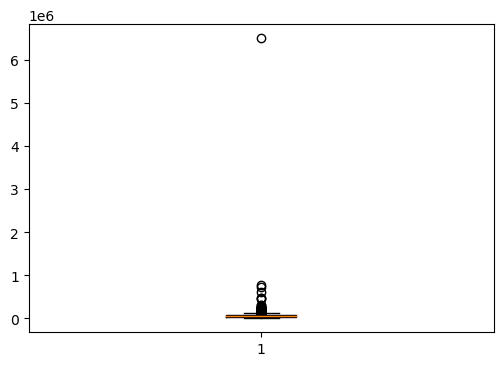

In [40]:
plt.figure(figsize=(6,4))
plt.boxplot(df['Kilometers_Driven'])
plt.show()

In [41]:
# Preparing the data for train test split

In [42]:
x=df.drop(['Price'],axis=1)

In [43]:
y=df['Price']

In [44]:
x.shape

(5844, 11)

In [45]:
y.shape

(5844,)

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.25)

In [47]:
x_train.shape

(4383, 11)

In [48]:
x_test.shape

(1461, 11)

In [49]:
y_train.shape


(4383,)

In [50]:
y_test.shape

(1461,)

In [51]:
x_train.isna().sum()

Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Seats                24
Mileage               2
Engine               23
Power                23
Brand                 0
dtype: int64

In [52]:
df['Owner_Type'].value_counts()

First             4808
Second             925
Third              103
Fourth & Above       8
Name: Owner_Type, dtype: int64

In [53]:
from sklearn.compose import ColumnTransformer
transformer=ColumnTransformer(transformers=[
    ('si',SimpleImputer(),['Seats','Mileage','Engine','Power']),
    ('OE',OrdinalEncoder(categories=[['First','Second','Third','Fourth & Above']]),['Owner_Type']),
    ('OHE',OneHotEncoder(sparse_output=False,drop='first',handle_unknown='ignore'),['Location','Fuel_Type','Transmission','Brand'])
    
],remainder='passthrough')

In [54]:
transformer.fit(x_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('si', SimpleImputer(),
                                 ['Seats', 'Mileage', 'Engine', 'Power']),
                                ('OE',
                                 OrdinalEncoder(categories=[['First', 'Second',
                                                             'Third',
                                                             'Fourth & '
                                                             'Above']]),
                                 ['Owner_Type']),
                                ('OHE',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 ['Location', 'Fuel_Type', 'Transmission',
                                  'Brand'])])

In [55]:
x_train_transformed=transformer.transform(x_train)

In [56]:
x_test_transformed=transformer.transform(x_test)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:227: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [57]:
x_train_transformed

array([[5.000e+00, 2.036e+01, 1.197e+03, ..., 0.000e+00, 2.012e+03,
        5.300e+04],
       [5.000e+00, 1.720e+01, 1.396e+03, ..., 0.000e+00, 2.007e+03,
        2.000e+05],
       [5.000e+00, 1.981e+01, 1.086e+03, ..., 0.000e+00, 2.010e+03,
        5.500e+04],
       ...,
       [5.000e+00, 1.080e+01, 2.354e+03, ..., 0.000e+00, 2.008e+03,
        9.200e+04],
       [5.000e+00, 2.400e+01, 1.120e+03, ..., 0.000e+00, 2.017e+03,
        3.300e+04],
       [5.000e+00, 1.470e+01, 1.150e+03, ..., 0.000e+00, 2.009e+03,
        7.500e+04]])

In [58]:
pd.DataFrame(x_train_transformed)

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
0,5.0,20.36,1197.0,78.90,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2012.0,53000.0
1,5.0,17.20,1396.0,53.50,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2007.0,200000.0
2,5.0,19.81,1086.0,68.05,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2010.0,55000.0
3,5.0,14.16,1968.0,174.30,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016.0,43000.0
4,7.0,15.10,2179.0,140.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2014.0,31000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4378,5.0,15.68,1999.0,177.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018.0,31427.0
4379,5.0,18.60,1197.0,81.83,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015.0,53000.0
4380,5.0,10.80,2354.0,152.00,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2008.0,92000.0
4381,5.0,24.00,1120.0,70.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017.0,33000.0


In [ ]:
df['Name'].nunique()